In [176]:
import numpy as np, sklearn.mixture as mix, matplotlib, sklearn.neighbors as neib
import matplotlib.pyplot as plt

In [146]:
%config InlineBackend.figure_formats = ['svg']
matplotlib.rcParams['font.family'] = 'P052-Roman'

In [147]:
np.random.seed(2)
data_a = np.random.normal(scale=1, size=(200,), loc = -0.5)
data_b = np.random.normal(scale=1, size=(50,), loc=3)
data = np.concatenate((data_a, data_b)).reshape(-1, 1)

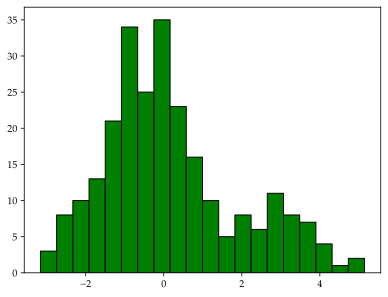

In [165]:
param_dict = dict(bins = 20, color = "green", edgecolor = "black")
h = plt.hist(data, **param_dict)

In [173]:
def add_gmm_curves(n, data, hist = None, replot_hist = False, param_dict = None):
    if param_dict is None:
            param_dict = {}
    h = hist
    if h is None:
        h = plt.hist(data, **param_dict)
        replot_hist = False
    gmm = mix.GaussianMixture(n_components = (n:= 2))
    gmm.fit(data)
    m = gmm.means_.ravel()
    w = gmm.weights_.ravel()
    c = gmm.covariances_.ravel()
    scale_factors = np.array([max(h[0])/w[i] for i in range(n)])
    X = np.array([np.linspace(m[i] - c[i]*5, m[i] + c[i]*n_sds, num=1000) for i in range(n)])
    Y = np.exp([-((X[i]-m[i])**2 / (2.0 * c[i]**2)) for i in range(n)])
    Y = (Y.T*w).T*max(h[0])
    if replot_hist:
        print("RP")
        plt.hist(data, **param_dict)
    for i in range(n):
        plt.plot(X[i], Y[i], color = "lime")
    

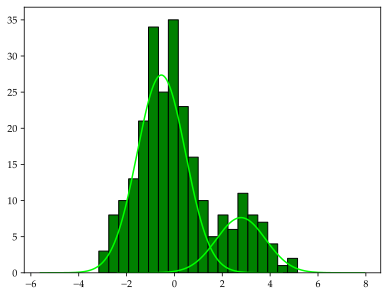

In [174]:
add_gmm_curves(2, data, replot_hist = False, param_dict=param_dict)

array([[-9.16757847e-01],
       [-5.56266827e-01],
       [-2.63619610e+00],
       [ 1.14027081e+00],
       [-2.29343559e+00],
       [-1.34174737e+00],
       [ 2.88141716e-03],
       [-1.74528809e+00],
       [-1.55795222e+00],
       [-1.40900761e+00],
       [ 5.14540445e-02],
       [ 1.79220801e+00],
       [-4.58460607e-01],
       [-1.61792545e+00],
       [ 3.90583206e-02],
       [-1.09615970e+00],
       [-5.19130497e-01],
       [ 6.75001220e-01],
       [-1.24787095e+00],
       [-4.90974749e-01],
       [-1.37810789e+00],
       [-6.56434170e-01],
       [-2.43429548e-01],
       [-1.48877905e+00],
       [-8.38821966e-01],
       [-7.36184031e-01],
       [-1.13765501e+00],
       [-1.68761229e+00],
       [-1.92121723e+00],
       [-6.53495196e-01],
       [-7.69056960e-01],
       [ 1.73136679e+00],
       [-2.93476758e+00],
       [-3.87273495e-01],
       [-1.29555463e-01],
       [ 8.59633863e-01],
       [ 1.85720678e-03],
       [-1.34421370e+00],
       [-4.9

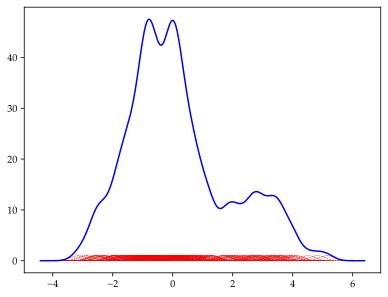

In [254]:
big_Y = np.zeros_like(data[1])
sd = 0.25
gridsize = 10000
n_sds = 5

grid = np.arange(np.min(np.round(data - n_sds*sd, n_sds))*gridsize, np.max(np.round(data + n_sds*sd, n_sds))*gridsize, dtype = int)
results = np.zeros_like(grid).astype(float)
lookup = {x: i for i, x in enumerate(grid)}
for d in data:
    # print(d)
    left = ((d - n_sds*sd)*gridsize).astype(int)[0]
    right = left + int(2*n_sds*sd*gridsize)
    left_idx = lookup[left]
    right_idx = lookup[right]
    X = np.array(range(left, right))/gridsize
    Y = np.exp(-((X-d)**2 / (2.0 * sd**2)))
    results[left_idx:right_idx] += Y
    plt.plot(X, Y, "r--", linewidth = 0.5)

plt.plot(grid/gridsize, results, "b-")

In [250]:
int(2*n_sds*sd*gridsize)

10000